In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# **EDA**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../input/digit-recognizer/train.csv")

In [4]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.isnull().values.any()

False

In [6]:
y = df.iloc[:,0]
X = df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
X.shape

(42000, 784)

In [8]:
y.shape

(42000,)

In [9]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y_train.iloc[1308]

1

In [11]:
X_train_plt = np.array(X_train.iloc[1308])
X_train_plt = X_train_plt.reshape((28, 28))

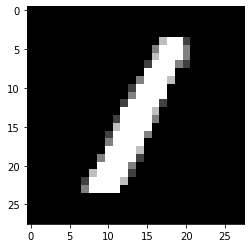

In [12]:
fig = plt.figure
plt.imshow(X_train_plt, cmap='gray')
plt.show()

(array([2799., 3164., 2763., 2880., 2714., 2590., 2740., 2921., 2729.,
        2840.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

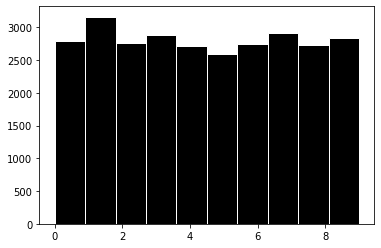

In [13]:
plt.hist(y_train, color = "black", ec="white")

(array([1333., 1520., 1414., 1471., 1358., 1205., 1397., 1480., 1334.,
        1348.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

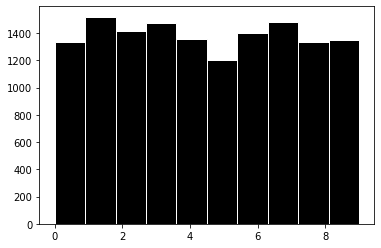

In [14]:
plt.hist(y_test, color = "black", ec="white")

# **Date Prep**

In [15]:
# Normalization
X_train = X_train/255
X_test = X_test/255

In [16]:
X_train.iloc[1].unique()

array([0.        , 0.14901961, 0.87058824, 0.88235294, 0.51372549,
       0.98823529, 0.97647059, 0.57254902, 0.34901961, 0.96470588,
       0.8627451 , 0.44313725, 0.38823529, 0.74901961, 0.8745098 ,
       0.05098039, 1.        , 0.99215686, 0.63529412, 0.11372549,
       0.78823529, 0.03529412, 0.3372549 , 0.17254902, 0.21568627,
       0.0627451 , 0.6627451 , 0.55294118, 0.54901961, 0.79607843,
       0.49411765, 0.66666667, 0.84313725, 0.46666667, 0.50196078,
       0.68235294, 0.24705882, 0.95294118, 0.69803922, 0.91372549,
       0.76470588, 0.79215686, 0.23137255, 0.9254902 , 0.32941176,
       0.21960784, 0.69411765, 0.02745098, 0.19607843, 0.10196078,
       0.81176471, 0.41568627, 0.02352941, 0.91764706, 0.63921569,
       0.82352941, 0.59607843, 0.01176471, 0.96078431, 0.12156863,
       0.28235294, 0.94117647, 0.77647059, 0.34509804, 0.34117647])

In [17]:
# Think about scaling

# **Model Building**


# **SVM**

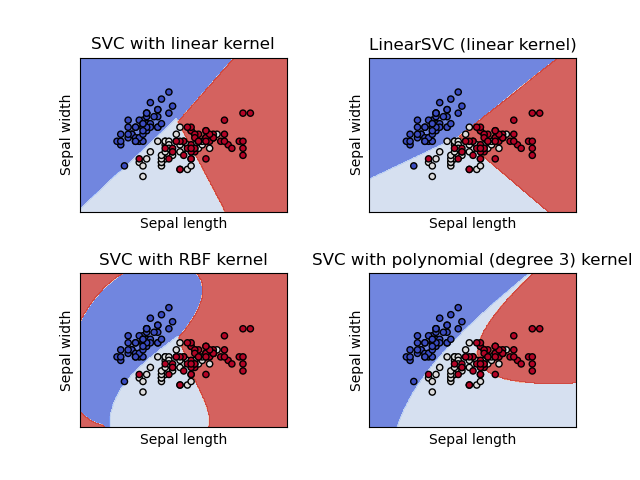

In [18]:
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [19]:
# Linear
linear_model = svm.SVC(kernel='linear')
linear_model.fit(X_train, y_train)
lin_y_pred = linear_model.predict(X_test)

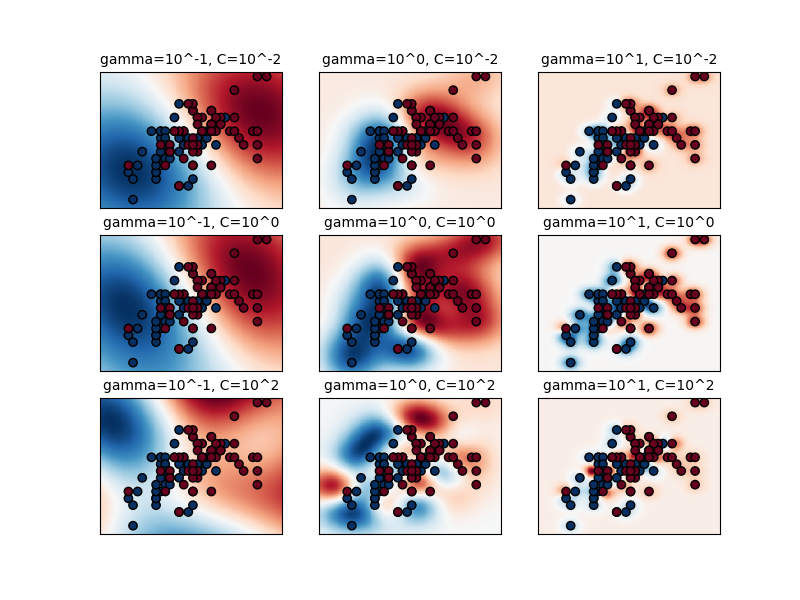

##### RBF Kernel is usually my default choice when it comes to non-linear problems

In [20]:
# Non Linear
non_linear_model = svm.SVC(kernel='rbf')
non_linear_model.fit(X_train, y_train)
nlin_y_pred = non_linear_model.predict(X_test)

In [21]:
# Non Linear with Cross Validation
# Warning : May take a long time depending on your range of hyperparameters
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Hyperparameters for Radial Basis Function kernel are C & gamma
param_grid = [ {'gamma': [0.01,0.001,0.0001],'C': [7,10]}]


cv_model = SVC(kernel="rbf")

# set up GridSearchCV()
model = GridSearchCV(estimator = cv_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', 
                        cv = cv, 
                        verbose = 1,
                        return_train_score=True)     

model.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.2f"
      % (model.best_params_, model.best_score_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 52.3min finished


The best parameters are {'C': 10, 'gamma': 0.0001} with a score of 0.92


In [28]:
# Replace the hyperparameters by the best ones indicated earlier. 
model = svm.SVC(C=10, gamma=0.001, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# **Results**

# **SVM**

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [24]:
print(classification_report(y_test, lin_y_pred))
print(confusion_matrix(y_test, lin_y_pred, labels=range(10)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1333
           1       0.96      0.98      0.97      1520
           2       0.91      0.92      0.92      1414
           3       0.90      0.90      0.90      1471
           4       0.93      0.95      0.94      1358
           5       0.89      0.89      0.89      1205
           6       0.96      0.94      0.95      1397
           7       0.95      0.94      0.94      1480
           8       0.93      0.89      0.91      1334
           9       0.92      0.91      0.92      1348

    accuracy                           0.93     13860
   macro avg       0.93      0.93      0.93     13860
weighted avg       0.93      0.93      0.93     13860

[[1300    0    7    0    2   12    6    0    6    0]
 [   0 1495    2    4    1    2    1    3   11    1]
 [  10   17 1301   15   22    8   14    8   17    2]
 [   6    7   38 1323    0   49    0   12   24   12]
 [   4    3    9    1 1289   

We can see an accuracy of 93% for the linear model.

In [25]:
print(classification_report(y_test, nlin_y_pred))
print(confusion_matrix(y_test, nlin_y_pred, labels=range(10)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1333
           1       0.98      0.99      0.99      1520
           2       0.98      0.97      0.97      1414
           3       0.97      0.96      0.97      1471
           4       0.96      0.97      0.97      1358
           5       0.98      0.97      0.97      1205
           6       0.98      0.98      0.98      1397
           7       0.98      0.97      0.98      1480
           8       0.97      0.97      0.97      1334
           9       0.96      0.96      0.96      1348

    accuracy                           0.97     13860
   macro avg       0.97      0.97      0.97     13860
weighted avg       0.97      0.97      0.97     13860

[[1322    0    1    0    2    1    5    0    1    1]
 [   0 1507    2    1    1    2    1    3    2    1]
 [   5    5 1366    4   10    1    4    6   11    2]
 [   2    4   11 1410    0   16    0    7   15    6]
 [   2    0    3    0 1323   

An accuracy of 97% for the non linear model.

In [29]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred, labels=range(10)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1333
           1       0.97      0.99      0.98      1520
           2       0.95      0.94      0.94      1414
           3       0.94      0.93      0.93      1471
           4       0.93      0.96      0.94      1358
           5       0.94      0.92      0.93      1205
           6       0.96      0.97      0.96      1397
           7       0.96      0.94      0.95      1480
           8       0.94      0.93      0.94      1334
           9       0.93      0.92      0.92      1348

    accuracy                           0.95     13860
   macro avg       0.95      0.95      0.95     13860
weighted avg       0.95      0.95      0.95     13860

[[1316    0    1    0    4    2    7    0    3    0]
 [   0 1499    4    3    1    2    2    2    7    0]
 [   6    9 1328    6   20    3   13    7   19    3]
 [   4    6   18 1367    0   33    3    9   21   10]
 [   3    3    6    1 1302   

With cross-validation on a non-linear model.